In [1]:
import os
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd

# Constants

In [2]:
lead_times = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#
experiment = "SIC_Attention_Res_UNet"
#
date_min = "20220101"
date_max = "20221231"
period = date_min + "_" + date_max
#
path_output = "/lustre/storeB/users/cyrilp/COSI/Figures/Article/"
if os.path.isdir(path_output) == False:
    os.system("mkdir -p " + path_output)
#
list_predictors = ["TOPAZ_SIC", "initial_bias", "ECMWF_T2M_cum", "wind", "SICobs_AMSR2_SIC", "SICobs_AMSR2_trend"]
#
sizefont = 25
sizefont_legend = 18
linewidth = 3

# Functions

In [3]:
def read_dataset(experiment, period, list_predictors, leadtime):    
    path_ref = "/lustre/storeB/project/copernicus/cosi/WP3/Data/Predictions/" + experiment + "/lead_time_" + str(leadtime) + "_days/scores/"
    path_perm_data = "/lustre/storeB/project/copernicus/cosi/WP3/Data/Predictor_importances/" + experiment + "/lead_time_" + str(leadtime) + "_days/scores/"
    #
    Dataset = {}
    Dataset["All_predictors"] = pd.read_csv(path_ref + "Scores_" + period + ".txt", delimiter = "\t")
    #
    for var in list_predictors:
        Dataset[var] = pd.read_csv(path_perm_data + "Scores_" + period + "_permuted_predictor_" + var + ".txt", delimiter = "\t")
    #
    for var in Dataset:
        Dataset[var] = Dataset[var].dropna(how = 'all', axis = 1)
    #
    return(Dataset)

In [4]:
def Mean_scores(Dataset):
    Mean_scores = {}
    #
    for var in Dataset:
        df = Dataset[var]
        #
        for metric in df:
            if metric != "start_date":
                Mean_scores[var + "_" + metric] = str(round(np.mean(df[metric]), 2))
    #
    return(Mean_scores)

In [5]:
def make_figure_difference_several_ice_edges(Scores, list_predictors, lead_times, sizefont, sizefont_legend, saving = False):
    #
    colorscale = plt.cm.accent
    colors = colorscale(np.linspace(0, 1, len(list_predictors)))
    lead_times_fig = [str(x) for x in (np.array(lead_times) + 1)]
    #
    plt.figure()
    plt.rc("xtick", labelsize = sizefont)
    plt.rc("ytick", labelsize = sizefont)
    fig, ax = plt.subplots(1, 4, figsize = (40, 10), facecolor = "w", edgecolor = "k")
    #
    ax = plt.subplot(141)
    for v, var in enumerate(list_predictors):
        RMSE_diff = Scores[var + "_RMSE_ML"] - Scores["All_predictors_RMSE_ML"]
        l = ax.plot(lead_times_fig, RMSE_diff, color = colors[v], label = var, linewidth = linewidth)
    ax.grid(alpha = 0.2)
    ax.set_title("RMSE difference", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Difference in RMSE (%)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 2)
    #ax.set_ylim([])
    #
    ax = plt.subplot(142)
    for v, var in enumerate(list_predictors):
        IIEElength_diff = 0.001 * (np.array(Scores[var + "_IIEElength_10_ML"]) - np.array(Scores["All_predictors_IIEElength_10_ML"]))
        l = ax.plot(lead_times_fig, IIEElength_diff , color = colors[v], label = var, linewidth = linewidth)
    ax.grid(alpha = 0.2)
    ax.set_title("Ice edge distance error difference (10 % SIC)", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Difference in ice edge distance error (km)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 2)
    #
    ax = plt.subplot(143)
    for v, var in enumerate(list_predictors):
        IIEElength_diff = 0.001 * (np.array(Scores[var + "_IIEElength_15_ML"]) - np.array(Scores["All_predictors_IIEElength_15_ML"]))
        l = ax.plot(lead_times_fig, IIEElength_diff , color = colors[v], label = var, linewidth = linewidth)
    ax.grid(alpha = 0.2)
    ax.set_title("Ice edge distance error difference (15 % SIC)", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Difference ice edge distance error (km)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 2)
    #
    ax = plt.subplot(144)
    for v, var in enumerate(list_predictors):
        IIEElength_diff = 0.001 * (np.array(Scores[var + "_IIEElength_20_ML"]) - np.array(Scores["All_predictors_IIEElength_20_ML"]))
        l = ax.plot(lead_times_fig, IIEElength_diff , color = colors[v], label = var, linewidth = linewidth)
    ax.grid(alpha = 0.2)
    ax.set_title("Ice edge distance error difference (20 % SIC)", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Difference ice edge distance error (km)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 2)
    #
    if saving == True:
        plt.savefig(path_output + "Predictor_importances_difference_" + experiment + "_" + date_min + "_" + date_max + ".png", bbox_inches = "tight")
    else:
        plt.show()
#####################
def make_figure_difference(Scores, list_predictors, lead_times, sizefont, sizefont_legend, saving = False):
    #
    colorscale = plt.cm.tab10
    colors = colorscale(np.linspace(0, 1, len(list_predictors)))
    lead_times_fig = [str(x) for x in (np.array(lead_times) + 1)]
    #
    plt.figure()
    plt.rc("xtick", labelsize = sizefont)
    plt.rc("ytick", labelsize = sizefont)
    fig, ax = plt.subplots(1, 2, figsize = (25, 10), facecolor = "w", edgecolor = "k")
    #
    ax = plt.subplot(121)
    for v, var in enumerate(list_predictors):
        var_label = var.replace("_", " ").replace("wind", "ECMWF wind").replace("cum", "").replace("T2M", "T2m").replace("initial bias", "TOPAZ initial error").replace("SICobs", "").replace("trend", "SIC trend").replace("ECMWF ECMWF", "ECMWF")
        RMSE_diff = Scores[var + "_RMSE_ML"] - Scores["All_predictors_RMSE_ML"]
        l = ax.plot(lead_times_fig, RMSE_diff, color = colors[v], label = var_label, linewidth = linewidth)
        print("RMSE", var_label, np.min(RMSE_diff), np.max(RMSE_diff), np.mean(RMSE_diff))
    ax.grid(alpha = 0.4)
    ax.set_title("RMSE difference", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Difference in RMSE (%)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 2)
    ax.text(-0.1,-0.05, "a)", fontsize = sizefont, ha = "left", transform = ax.transAxes) 
    #
    ax = plt.subplot(122)
    for v, var in enumerate(list_predictors):
        var_label = var.replace("_", " ").replace("wind", "ECMWF wind").replace("cum", "").replace("T2M", "T2m").replace("initial bias", "TOPAZ initial error").replace("SICobs", "").replace("trend", "SIC trend").replace("ECMWF ECMWF", "ECMWF")
        IIEElength_diff = 0.001 * (np.array(Scores[var + "_IIEElength_15_ML"]) - np.array(Scores["All_predictors_IIEElength_15_ML"]))
        l = ax.plot(lead_times_fig, IIEElength_diff , color = colors[v], label = var_label, linewidth = linewidth)
        print("IIEElength", var_label, np.min(IIEElength_diff), np.max(IIEElength_diff), np.mean(IIEElength_diff))
    ax.grid(alpha = 0.4)
    ax.set_title("Ice edge distance error difference", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Difference in ice edge distance error (km)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    #ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 2)
    ax.text(-0.1,-0.05, "b)", fontsize = sizefont, ha = "left", transform = ax.transAxes) 
    #
    if saving == True:
        plt.savefig(path_output + "Predictor_importances_permuted_date_" + experiment + "_" + date_min + "_" + date_max + ".png", bbox_inches = "tight")
    else:
        plt.show()

# Data processing

RMSE TOPAZ SIC 7.69 18.810000000000002 11.406
RMSE TOPAZ initial error 0.5299999999999994 3.33 1.6460000000000001
RMSE ECMWF T2m  0.6699999999999999 1.4699999999999998 0.9029999999999998
RMSE ECMWF wind 0.629999999999999 1.3699999999999992 1.0459999999999998
RMSE  AMSR2 SIC 6.68 14.349999999999998 10.432
RMSE  AMSR2 SIC trend 0.019999999999999574 0.09999999999999964 0.06499999999999977
IIEElength TOPAZ SIC 33.82602 131.02414 65.688388
IIEElength TOPAZ initial error 2.1854400000000025 14.053480000000002 6.929908
IIEElength ECMWF T2m  1.8457199999999976 9.340350000000003 4.127802000000001
IIEElength ECMWF wind 2.126189999999999 4.171529999999999 3.2463360000000003
IIEElength  AMSR2 SIC 16.847489999999997 83.12113000000001 63.344294000000005
IIEElength  AMSR2 SIC trend 0.020969999999997525 0.40752000000000044 0.1322659999999996


<Figure size 640x480 with 0 Axes>

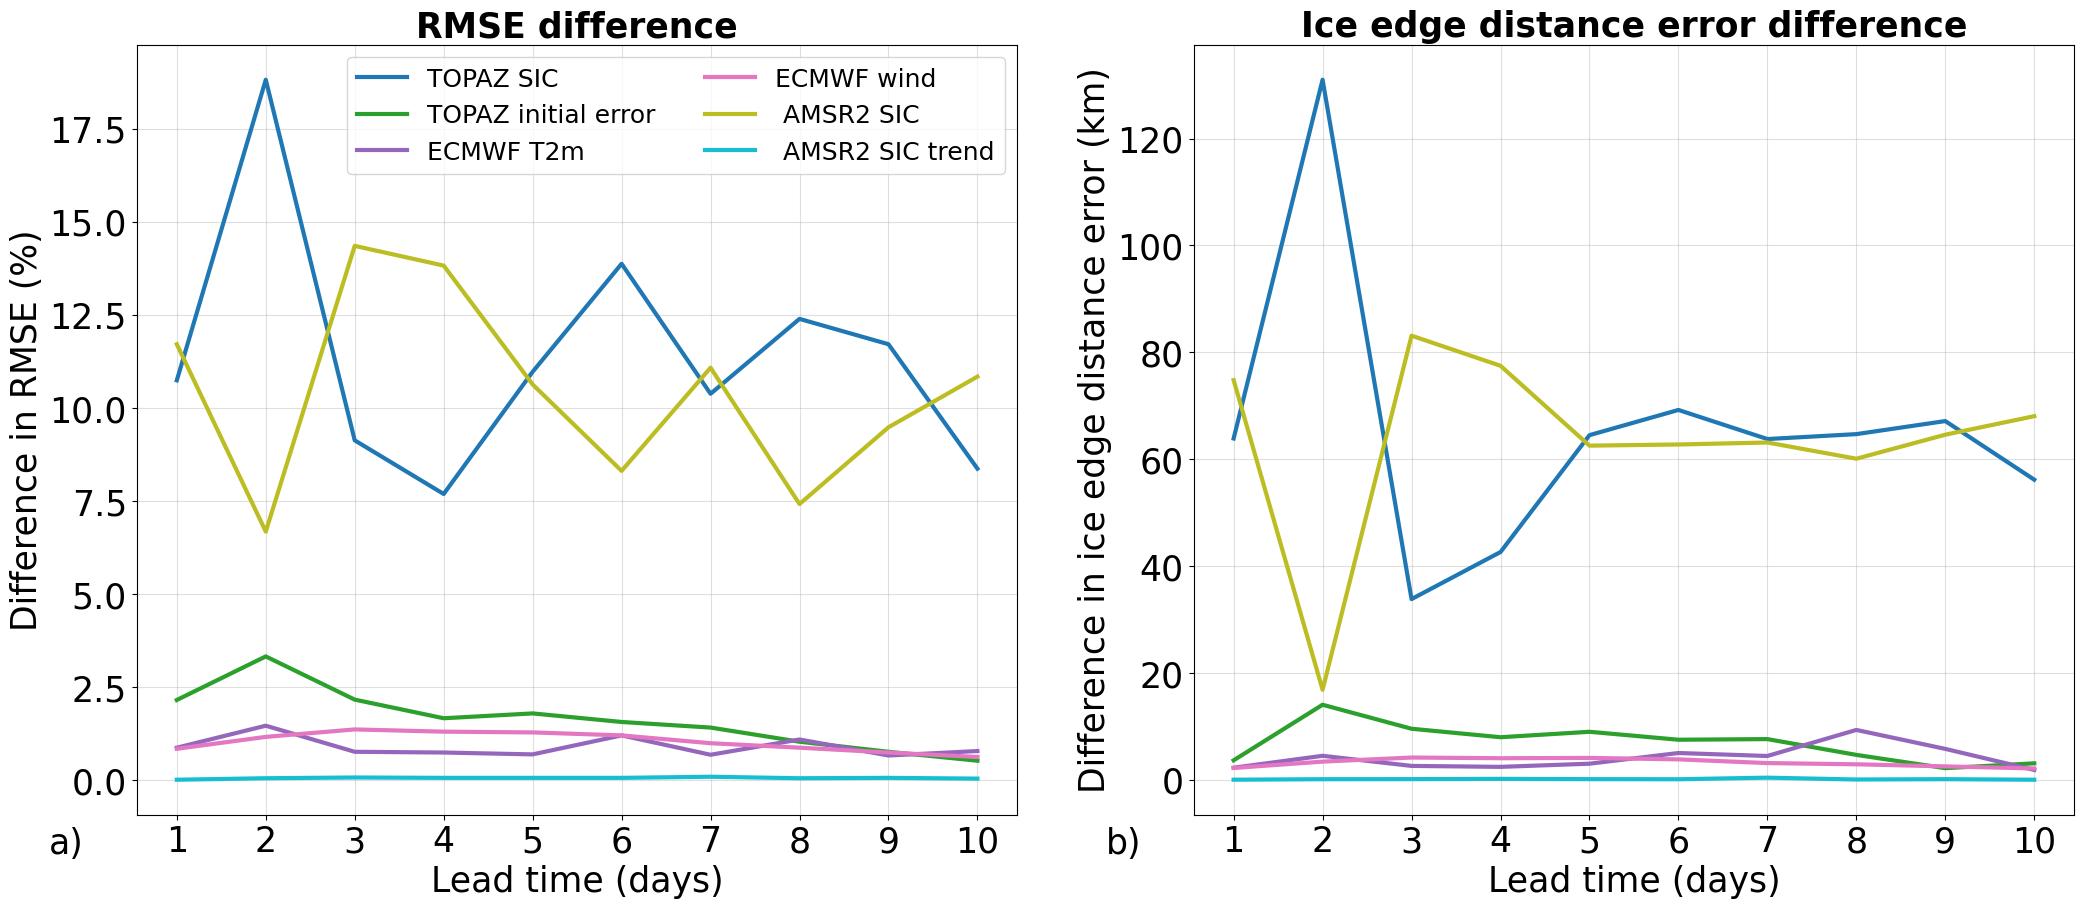

In [6]:
Scores = {}
#
for lt, leadtime in enumerate(lead_times):
    Dataset = read_dataset(experiment, period, list_predictors, leadtime)
    Scores_lt = Mean_scores(Dataset)
    #
    if lt == 0:
        for var in Scores_lt:
            Scores[var] = np.full(len(lead_times), np.nan)
            Scores[var][lt] = float(Scores_lt[var])
    #
    else:
        for var in Scores_lt:
            Scores[var][lt] = float(Scores_lt[var])
#
#make_figure_absolute(Scores, list_predictors, lead_times, sizefont, sizefont_legend, saving = False)
make_figure_difference(Scores, list_predictors, lead_times, sizefont, sizefont_legend, saving = True)